<a href="https://colab.research.google.com/github/thejustinfields/incomepredictions/blob/main/AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from xgboost import XGBClassifier

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
filename="/content/drive/MyDrive/adult.csv"
df = pd.read_csv(filename)
df

In [ ]:
df.info()

- There are no missing values
- There are 48842 rows and 15 columns

In [ ]:
df['income'].value_counts(normalize=True)

##Drop Irrelevant Columns

In [ ]:
df = df.drop(columns=["fnlwgt", "educational-num", "relationship"])
df.head()

- "fnlwgt" and "educational-num" are not relevant to outcomes
- "Relationship" gives the same information as "marital-status"

In [ ]:
pd.set_option("display.max_columns", None)
df.describe()

##Drop Duplicates

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

In [ ]:
df.isna().sum()

##Check Data Inconsitencies

In [ ]:
dtypes=df.dtypes
str_cols = dtypes[dtypes=="object"].index
str_cols

In [ ]:
#check column information for inconsistencies
for col in str_cols:
  print(f"-Column= {col}")
  print(df[col].value_counts(dropna=False))
  print("/n/n")

In [ ]:
#Drop rows with ? as an entry
df.drop(df[df["workclass"] == "?"].index, inplace=True)
df.drop(df[df["occupation"] == "?"].index, inplace=True)
#Rename native-country to remove the "-"
df = df.rename(columns = {"native-country": "nativecountry"})
df.drop(df[df["nativecountry"] == '?'].index, inplace=True)
df.head()

In [ ]:
#Check value counts
pd.set_option("display.max_rows", None)
df["capital-gain"].value_counts()

In [ ]:
df["capital-loss"].value_counts()

In [ ]:
df["age"].value_counts()

In [ ]:
df["workclass"].value_counts()

In [ ]:
#Delete without-pay because it is statistically insignificant
df["workclass"] = df["workclass"].astype("category")
df["workclass"] = df["workclass"].cat.remove_categories("Without-pay")
df["workclass"].value_counts()

In [ ]:
#Combine all government employees
df['workclass'] = df['workclass'].replace({'Local-gov':'Government'})
df['workclass'] = df['workclass'].replace({'State-gov':'Government'})
df['workclass'] = df['workclass'].replace({'Federal-gov':'Government'})
df['workclass'].value_counts()

In [ ]:
df["education"].value_counts()

In [ ]:
#Remove Preschool because it is statistically insignificant
df["education"] = df["education"].astype("category")
df["education"] = df["education"].cat.remove_categories("Preschool")
df["education"].value_counts()

In [ ]:
#Combine categories to create less categories
df['education'] = df['education'].replace({'1st-4th':'Gradeschool'})
df['education'] = df['education'].replace({'5th-6th':'Gradeschool'})
df['education'] = df['education'].replace({'7th-8th':'Gradeschool'})
df['education'] = df['education'].replace({'9th':'Highschool'})
df['education'] = df['education'].replace({'10th':'Highschool'})
df['education'] = df['education'].replace({'11th':'Highschool'})
df['education'] = df['education'].replace({'12th':'Highschool_Grad'})
df['education'] = df['education'].replace({'HS-grad':'Highschool'})
df['education'] = df['education'].replace({'Some-college':'Undergrad'})
df['education'] = df['education'].replace({'Bachelors':'Undergrad'})
df['education'] = df['education'].replace({'Assoc-voc':'Undergrad'})
df['education'] = df['education'].replace({'Assoc-acdm':'Undergrad'})
df['education'] = df['education'].replace({'Prof-school':'Graduate'})
df['education'] = df['education'].replace({'Masters':'Graduate'})
df['education'] = df['education'].replace({'Doctorate':'Graduate'})
df['education'].value_counts()

In [ ]:
df["marital-status"].value_counts()

In [ ]:
#Remove Married-AF-spouse because it is statistically insignificant
df["marital-status"] = df["marital-status"].astype("category")
df["marital-status"] = df["marital-status"].cat.remove_categories("Married-AF-spouse")
df["marital-status"].value_counts()

In [ ]:
df["occupation"].value_counts()

In [ ]:
#Remove Armed Forces because it is statistically insignificant
df["occupation"] = df["occupation"].astype("category")
df["occupation"] = df["occupation"].cat.remove_categories("Armed-Forces")
df["occupation"].value_counts()

In [ ]:
df["race"].value_counts()

In [ ]:
df["gender"].value_counts()

In [ ]:
df["nativecountry"].value_counts()

In [ ]:
#Combine nations into continents
df['nativecountry'] = df['nativecountry'].replace({'Holand-Netherlands':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Hungary':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Scotland':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Yugoslavia':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Ireland':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'France':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Greece':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Portugal':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Poland':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Italy':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'England':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Germany':'Europe'})
df['nativecountry'] = df['nativecountry'].replace({'Honduras':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Ecuador':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Peru':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Nicaragua':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Columbia':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Guatemala':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'El-Salvador':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Mexico':'CentralSouthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Philippines':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'India':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'China':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Japan':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Vietnam':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Iran':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Taiwan':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Thailand':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Hong':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Cambodia':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'Laos':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'South':'Asia'})
df['nativecountry'] = df['nativecountry'].replace({'United-States':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Canada':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Outlying-US(Guam-USVI-etc)':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Puerto-Rico':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Cuba':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Jamaica':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Dominican-Republic':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Haiti':'NorthAmerica'})
df['nativecountry'] = df['nativecountry'].replace({'Trinadad&Tobago':'NorthAmerica'})
df['nativecountry'].value_counts()

##Check for Outliers

In [ ]:
data = df["age"]
fig, ax = plt.subplots()
ax.boxplot([data]);

In [ ]:
df["age"].describe().round(0)

In [ ]:
data = df["capital-gain"]
fig, ax = plt.subplots()
ax.boxplot([data]);

In [ ]:
df["capital-gain"].describe().round(0)

##Univariate Visuals

In [ ]:
# Checking how many categories in each column
cat_cols = df.select_dtypes('object').columns
df[cat_cols].nunique()

In [ ]:
sns.heatmap(df.corr(), cmap="RdBu", annot=True);

In [ ]:
ax = sns.countplot(data=df, x="workclass")
ax.set_title('Work Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
ax = sns.countplot(data=df, x="education")
ax.set_title('Education Level')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="marital-status")
ax.set_title('Marital Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="occupation")
ax.set_title('Occupation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="race")
ax.set_title('Race')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="gender")
ax.set_title('Gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [ ]:
ax = sns.countplot(data=df, x="income")
ax.set_title('Income Levels')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

- More people make less than 50k than those who earn over 50k

##Explanatory Visualizations

In [ ]:
fig=plt.subplots(figsize=(12,7))
ax = sns.barplot(data=df, x="age", y="income", hue='nativecountry')

- The highest earners globally are over 40.
- The highest earners live in North America and Europe

In [ ]:
ax = sns.countplot(data=df, x='income', hue='marital-status')

- Those who have never been married seem to make less than those who are married.
- Those who have been divorced seem to make less.

In [ ]:
ax = sns.countplot(data=df, x='income', hue='workclass')

- The private sector seems to be the place to work to make the most amount of money.

In [ ]:
ax = sns.countplot(data=df, x='income', hue='education')

- Undergraduates seem to make the most money.

##Modeling

In [ ]:
#Convert target to numeric values
df['income'] = df['income'].replace({'<=50':0, '>50k':1})
# Save X data
X = df.drop(columns = 'income')
# Encode our target
y = df['income']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [ ]:
#Imputers
freq_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")
#Scaler
scaler = StandardScaler()
#OneHotEndoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse = False)

In [ ]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [ ]:
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

In [ ]:
#Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

In [ ]:
#Tuples for ColumnTransformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

In [ ]:
preprocessor.fit(X_train)

In [ ]:
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# fit PCA
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

In [380]:
#Handle Class Imbalance
over_sampler = RandomOverSampler()
#Scale and oversample the data.
X_train_over, y_train_over = over_sampler.fit_resample(X_train_pca, y_train)
#Explore the sresampled data
print('Original X_train class balance')
print(y_train.value_counts())
print('\nOversampled X_train_over class balance')
y_train_over = pd.Series(y_train_over)
print(y_train_over.value_counts())

Original X_train class balance
<=50K    20843
>50K      7498
Name: income, dtype: int64

Oversampled X_train_over class balance
<=50K    20843
>50K     20843
Name: income, dtype: int64


              precision    recall  f1-score   support

       <=50K       0.86      0.70      0.77      6980
        >50K       0.44      0.68      0.53      2467

    accuracy                           0.69      9447
   macro avg       0.65      0.69      0.65      9447
weighted avg       0.75      0.69      0.71      9447



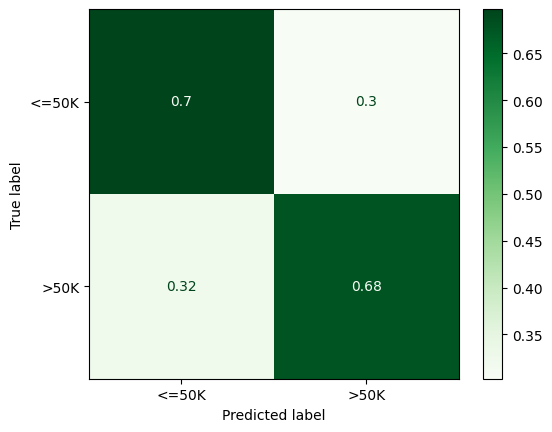

In [375]:
#Create the oversampling modeling pipeline
knn = KNeighborsClassifier()
over_sample_knn_pipe = make_sampler_pipeline(over_sampler, knn)
#Fit and evaluate the model
over_sample_knn_pipe.fit(X_train_over, y_train_over)
knn_over_test_preds = over_sample_knn_pipe.predict(X_test_pca)
print(classification_report(y_test, knn_over_test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, knn_over_test_preds, normalize='true', cmap='Greens');

In [246]:
knn_predictions = over_sample_knn_pipe.predict(X_test_pca)
knn_predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [247]:
knn_acc_score = over_sample_knn_pipe.score(X_test_pca, y_test)
knn_acc_score

0.6916481422673865

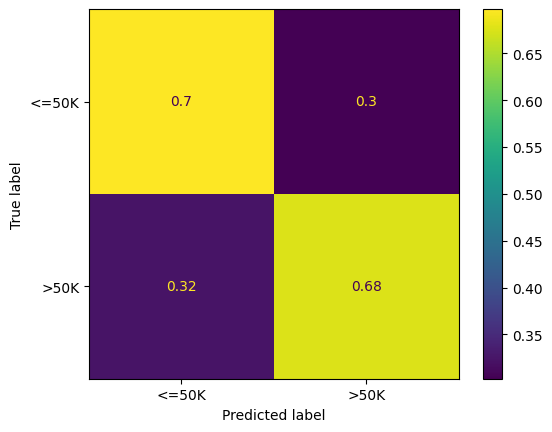

In [248]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions, normalize='true');

In [249]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

       <=50K       0.86      0.70      0.77      6980
        >50K       0.44      0.68      0.53      2467

    accuracy                           0.69      9447
   macro avg       0.65      0.69      0.65      9447
weighted avg       0.75      0.69      0.71      9447



In [250]:
over_sample_knn_pipe.get_params()

{'memory': None,
 'steps': [('randomoversampler', RandomOverSampler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'randomoversampler': RandomOverSampler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'randomoversampler__random_state': None,
 'randomoversampler__sampling_strategy': 'auto',
 'randomoversampler__shrinkage': None,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [251]:
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [252]:
knn_pipe_gs = GridSearchCV(over_sample_knn_pipe, knn_param_grid)

knn_pipe_gs.fit(X_train_pca, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test_pca, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.7293320630888113


In [253]:
knn_gs_predictions = knn_pipe_gs.predict(X_test_pca)
knn_gs_predictions

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [254]:
knngs_acc_score = knn_pipe_gs.score(X_test_pca, y_test)
knngs_acc_score

0.7293320630888113

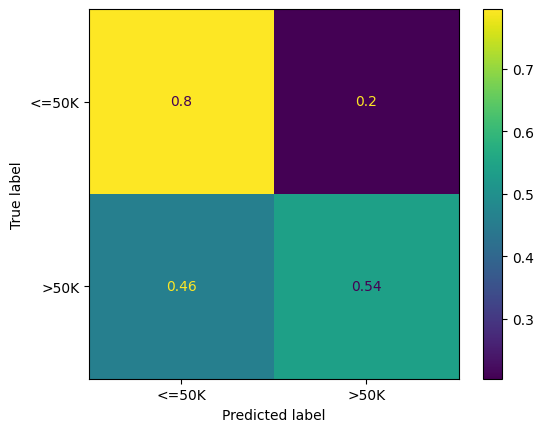

In [255]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_gs_predictions, normalize='true');

In [ ]:
print(classification_report(y_test, knn_gs_predictions))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      6980
        >50K       0.73      0.36      0.48      2467

    accuracy                           0.80      9447
   macro avg       0.77      0.65      0.68      9447
weighted avg       0.79      0.80      0.77      9447



###KNN Observations
- Predicts <=50 81% precision
- Predicts >50k 73% precision
- Overall .72 accuracy score
- Potentially a good model to use

###Random Forest

In [287]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

       <=50K       0.88      0.74      0.80      6980
        >50K       0.49      0.71      0.58      2467

    accuracy                           0.73      9447
   macro avg       0.68      0.73      0.69      9447
weighted avg       0.78      0.73      0.74      9447



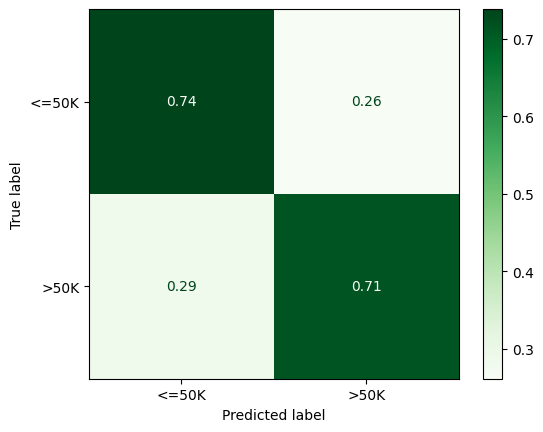

In [323]:
#Create the oversampling modeling pipeline
over_sample_rf_pipe = make_sampler_pipeline(scaler, over_sampler, rf)
#Fit and evaluate the model
over_sample_rf_pipe.fit(X_train_over, y_train_over)
rf_over_test_preds = over_sample_rf_pipe.predict(X_test_pca)
print(classification_report(y_test, rf_over_test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, rf_over_test_preds, normalize='true', cmap='Greens');

In [324]:
over_sample_rf_pipe.fit(X_train_over, y_train_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomoversampler', RandomOverSampler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [325]:
rf_predictions = over_sample_rf_pipe.predict(X_test_pca)
rf_predictions

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [326]:
rf_acc_score = over_sample_rf_pipe.score(X_test_pca, y_test)
rf_acc_score

0.731237429871917

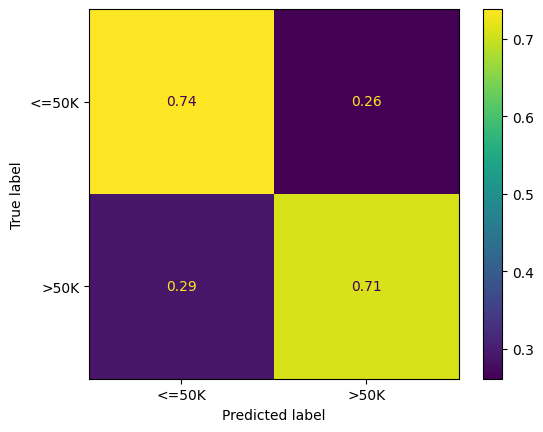

In [327]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, normalize='true');

In [328]:
over_sample_rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomoversampler', RandomOverSampler()),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomoversampler': RandomOverSampler(),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomoversampler__random_state': None,
 'randomoversampler__sampling_strategy': 'auto',
 'randomoversampler__shrinkage': None,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier

In [329]:
rf_param_grid = {'randomforestclassifier__max_depth': [1,2,3],
              'randomforestclassifier__min_samples_leaf': [3,15,20],
              'randomforestclassifier__min_samples_split': [2, 10, 100]}

In [330]:
rf_grid_search = GridSearchCV(over_sample_rf_pipe, rf_param_grid)

In [331]:
rf_grid_search.fit(X_train_over, y_train_over)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomoversampler',
                                        RandomOverSampler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [1, 2, 3],
                         'randomforestclassifier__min_samples_leaf': [3, 15,
                                                                      20],
                         'randomforestclassifier__min_samples_split': [2, 10,
                                                                       100]})

In [297]:
print('Best Random Forest Parameters:')
print(rf_grid_search.best_params_)
best_pipe = rf_grid_search.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {best_pipe.score(X_test_pca, y_test)}')

Best Random Forest Parameters:
{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy of best Logistic Regression model is: 0.7987720969619985


In [332]:
rf_gs_predictions = rf_grid_search.predict(X_test_pca)
rf_gs_predictions

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [333]:
rfgs_acc_score = rf_grid_search.score(X_test_pca, y_test)
rfgs_acc_score

0.6994813168201546

In [334]:
print(classification_report(y_test, rf_gs_predictions))

              precision    recall  f1-score   support

       <=50K       0.89      0.67      0.77      6980
        >50K       0.46      0.77      0.57      2467

    accuracy                           0.70      9447
   macro avg       0.67      0.72      0.67      9447
weighted avg       0.78      0.70      0.72      9447



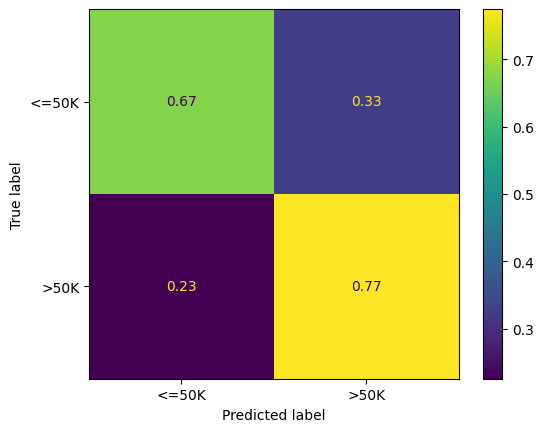

In [335]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_gs_predictions, normalize='true');

###Random Forest Observations:
- Predicts <=50k 89% correct
- Only predicts >50k 46% correct
- Overall accuracy score .69
- Not a great model to use

###Logistic Regression

0.7067120855922852
0.7288027945379486
              precision    recall  f1-score   support

       <=50K       0.87      0.75      0.80      6980
        >50K       0.49      0.68      0.57      2467

    accuracy                           0.73      9447
   macro avg       0.68      0.71      0.68      9447
weighted avg       0.77      0.73      0.74      9447



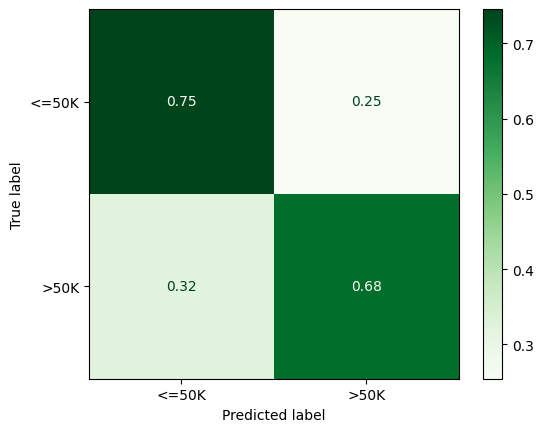

In [338]:
# Make an instance of the model with default parameters
logreg = LogisticRegression(max_iter=1000)
# Put scaler and model in a pipeline
over_sample_logreg_pipe = make_sampler_pipeline(scaler, over_sampler, logreg)
# Train the model on the data, store the information learned from the data
over_sample_logreg_pipe.fit(X_train_over, y_train_over)

logreg_predictions = over_sample_logreg_pipe.predict(X_test_pca)
print(over_sample_logreg_pipe.score(X_train_over, y_train_over))
print(over_sample_logreg_pipe.score(X_test_pca, y_test))

print(classification_report(y_test, logreg_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, logreg_predictions, normalize='true', cmap='Greens');

In [339]:
accuracy = accuracy_score(y_test, logreg_predictions)
accuracy

0.7288027945379486

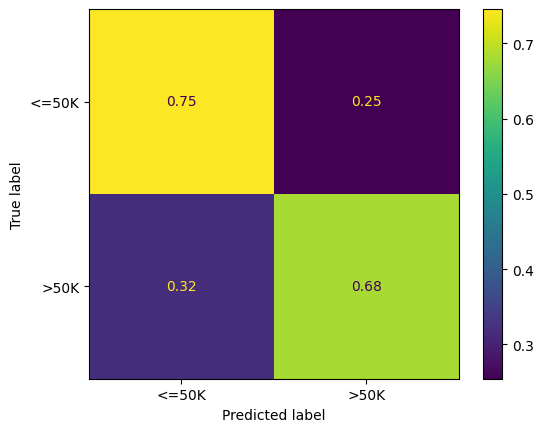

In [340]:
ConfusionMatrixDisplay.from_predictions(y_test, logreg_predictions, normalize='true');

In [342]:
#GridSearchCV
over_sample_logreg_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomoversampler', RandomOverSampler()),
  ('logisticregression', LogisticRegression(max_iter=1000))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomoversampler': RandomOverSampler(),
 'logisticregression': LogisticRegression(max_iter=1000),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomoversampler__random_state': None,
 'randomoversampler__sampling_strategy': 'auto',
 'randomoversampler__shrinkage': None,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None

In [343]:
pipe_param_grid = {'logisticregression__penalty': ['l1', 'l2'],
               'logisticregression__solver': ['liblinear'],
              'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]}

In [344]:
lr_pipe_gs = GridSearchCV(over_sample_logreg_pipe, pipe_param_grid)

lr_pipe_gs.fit(X_train_over, y_train_over)
print('Best Logistic Regression Parameters:')
print(lr_pipe_gs.best_params_)
best_pipe = lr_pipe_gs.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {best_pipe.score(X_test_pca, y_test)}')

Best Logistic Regression Parameters:
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Accuracy of best Logistic Regression model is: 0.7158886418968985


In [345]:
lr_pipe_predictions = lr_pipe_gs.predict(X_test_pca)

In [346]:
lr_pipe_accuracy = accuracy_score(y_test, lr_pipe_predictions)
lr_pipe_accuracy

0.7158886418968985

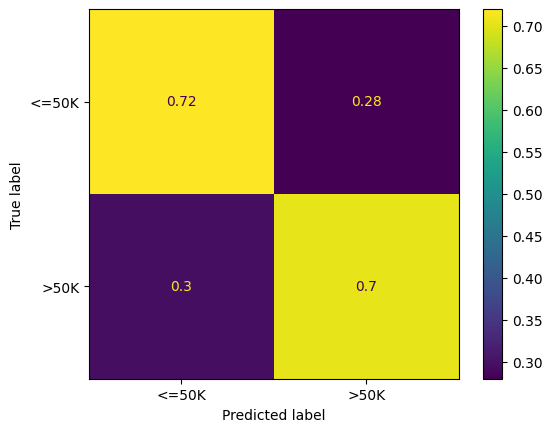

In [347]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_pipe_predictions, normalize='true');

In [348]:
print(classification_report(y_test, lr_pipe_predictions))

              precision    recall  f1-score   support

       <=50K       0.87      0.72      0.79      6980
        >50K       0.47      0.70      0.56      2467

    accuracy                           0.72      9447
   macro avg       0.67      0.71      0.68      9447
weighted avg       0.77      0.72      0.73      9447



###Logistic Regression Observations:
- Predicts <=50k 87% correct
- Only predicts >50k 47% correct
- Overall accuracy score .71
- Not the best model to use

##XGBoost Model

In [358]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_gb = le.fit_transform(y_train_over)
y_test_gb = le.fit_transform(y_test)

xgb = XGBClassifier()
xgb.fit(X_train_over, y_train_gb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [365]:
gb_pipe_predictions = xgb.predict(X_test_pca)
gb_pipe_predictions

array([0, 1, 1, ..., 0, 0, 0])

In [366]:
gb_pipe_accuracy = accuracy_score(y_test_gb, gb_pipe_predictions)
gb_pipe_accuracy

0.737482798772097

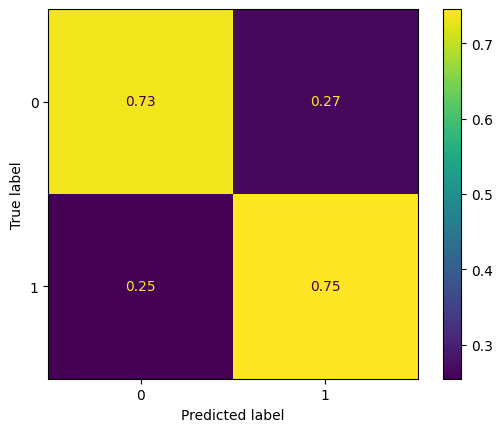

In [367]:
ConfusionMatrixDisplay.from_predictions(y_test_gb, gb_pipe_predictions, normalize='true');

In [378]:
print(classification_report(y_test_gb, gb_pipe_predictions))

              precision    recall  f1-score   support

           0       0.89      0.73      0.81      6980
           1       0.50      0.75      0.60      2467

    accuracy                           0.74      9447
   macro avg       0.69      0.74      0.70      9447
weighted avg       0.79      0.74      0.75      9447



###XGBoost Observations:
- Predicts <=50k 89% correct
- Only predicts >50k 50% correct
- Overall accuracy score .73
- Not the best model to use

#Final Choice:
- The best model to use is KNN with hyperparameter tuning: {'kneighborsclassifier__n_neighbors': 2, 'kneighborsclassifier__p': 4, 'kneighborsclassifier__weights': 'uniform'}

- Predicts <=50 81% precision
- Predicts >50k 73% precision
- Overall .72 accuracy score
- Doesn't have the highest precision for <=50k of all models but has the highest precision for >50k.
  - The precision for both classes is closest together in this model.